In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [5]:
df = pd.read_csv("data/PRESCRIPTION.csv")

In [3]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",NaN,NaN,NaN,NaN,NaN
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",NaN,NaN,NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",NaN,NaN,NaN,NaN,NaN
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,NaN,NaN,NaN,NaN,NaN
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,NaN,NaN,NaN
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,NaN,NaN,NaN
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",NaN,NaN,NaN,NaN,NaN
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1048575, 10)

In [8]:
df.isna().sum()/df.shape[0]

ID         0.000000
Date       0.000000
Prelibt    0.000000
CIP        0.000000
Prepost    0.023375
DCI        1.000000
ATC        1.000000
DOSE       1.000000
Freq       1.000000
Durée      1.000000
dtype: float64

<Axes: >

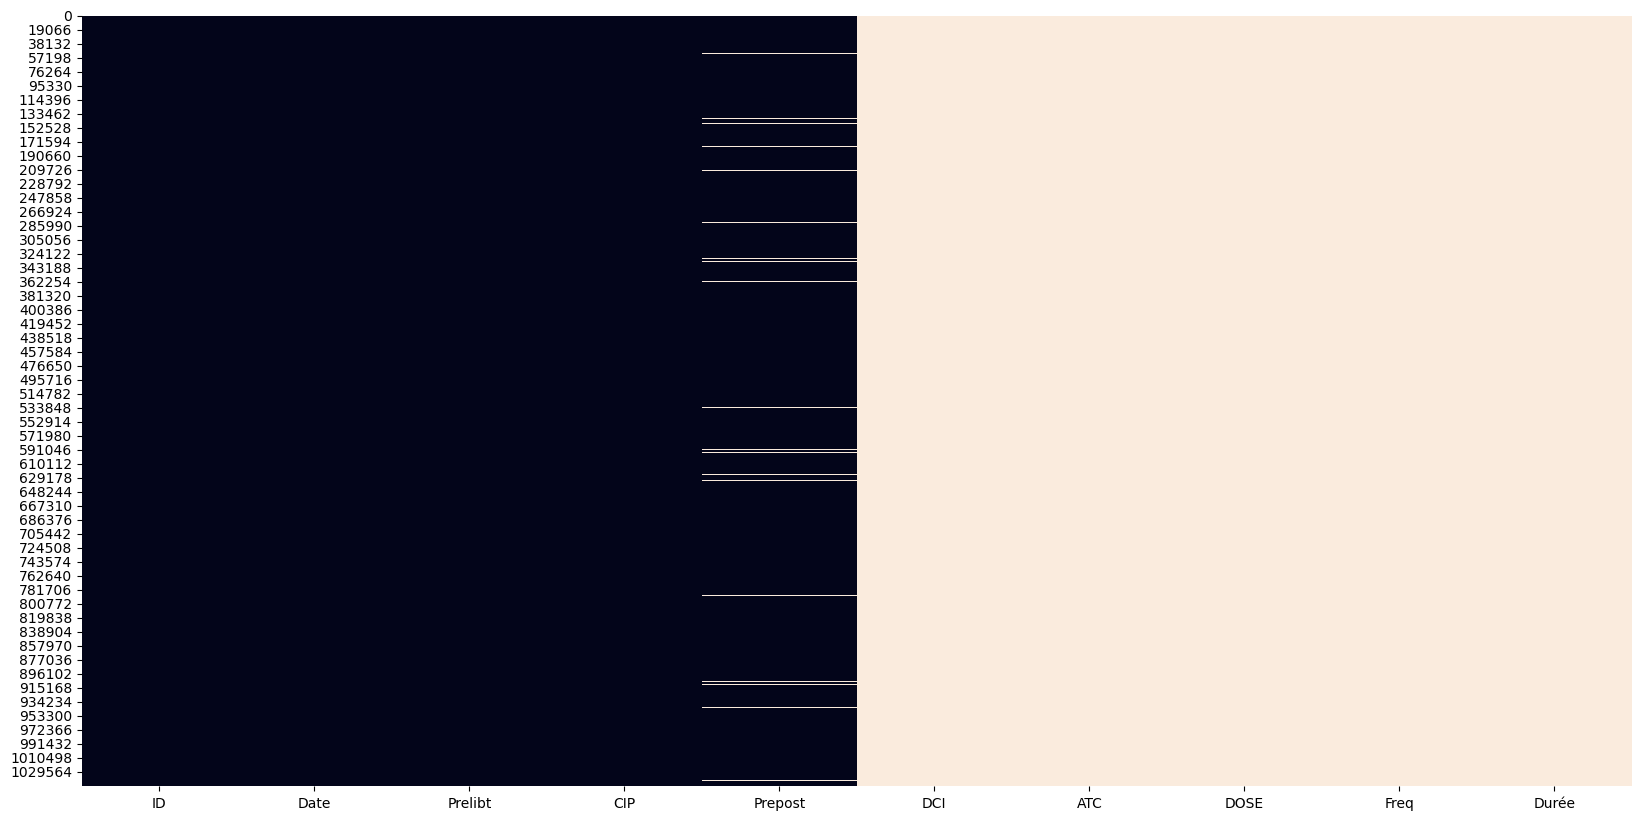

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

### Visites 

In [9]:
visites = df.groupby("ID")["Date"].nunique()


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

chronologie = df.groupby("ID").agg(
    premiere_visite=("Date","min"),
    derniere_visite=("Date","max"),
    nb_visites=("Date","nunique"),
    duree_suivi=("Date", lambda x: x.max() - x.min())
)


In [13]:
chronologie

,premiere_visite,derniere_visite,nb_visites,duree_suivi
ID,,,,
1,2004-04-14,2004-04-14,1,0 days
2,2013-10-01,2023-06-12,24,3541 days
3,2023-11-06,2023-11-06,1,0 days
4,2004-01-15,2011-01-28,64,2570 days
5,2016-04-29,2023-06-22,10,2610 days
...,...,...,...,...
600000,2022-07-22,2023-12-29,6,525 days
700000,2020-06-09,2021-01-18,5,223 days
800000,2014-10-23,2023-12-05,21,3330 days


In [ ]:
# date de visite 

In [24]:
date_min = df["Date"].min()
date_max = df["Date"].max()

print(date_min)
print(date_max)


2004-01-02 00:00:00
2023-12-30 00:00:00


In [22]:
df["ID"].nunique()  #nb pateins

12859

In [27]:
nb_visites = df.groupby("ID")["Date"].nunique().sum()
print("Nombre total de visites :", nb_visites)


Nombre total de visites : 237967


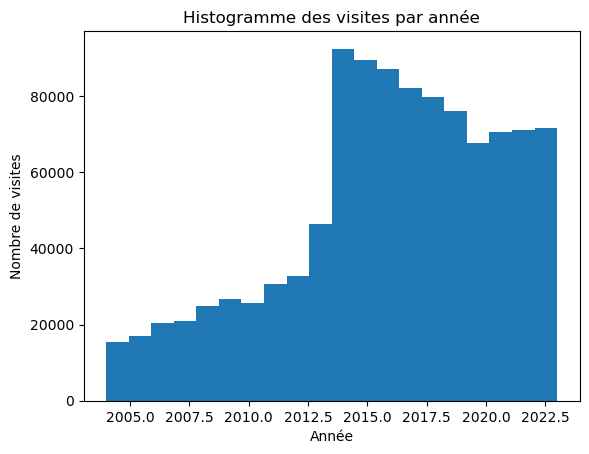

In [30]:


df["annee"] = df["Date"].dt.year

plt.hist(df["annee"], bins=20)
plt.xlabel("Année")
plt.ylabel("Nombre de visites")
plt.title("Histogramme des visites par année")
plt.show()


### medicaments 

In [33]:
df["Medicament"] = df["Prelibt"].str.split().str[0]

In [34]:
df["Medicament"].value_counts()

Medicament
UVEDOSE           63642
NORVIR            53399
TRUVADA           42990
PREZISTA          33425
KIVEXA            23643
                  ...  
INFANRIXQUINTA        1
REPHRESH              1
POSICYCLINE           1
VERRULYSE             1
EVRA                  1
Name: count, Length: 3367, dtype: int64

In [35]:
med=df["Medicament"].value_counts()

In [36]:
med.head(20)

Medicament
UVEDOSE      63642
NORVIR       53399
TRUVADA      42990
PREZISTA     33425
KIVEXA       23643
ISENTRESS    20818
REYATAZ      20258
BACTRIM      17285
TRIUMEQ      16670
BIKTARVY     15689
EVIPLERA     15092
DOLIPRANE    14370
DEXERYL      14257
CRESTOR      13689
TIVICAY      13282
VIRAMUNE     10800
KARDEGIC     10432
ODEFSEY       9870
KALETRA       9737
GENVOYA       9500
Name: count, dtype: int64

In [37]:
df['Prepost_clean'] = df['Prepost'].str.lower().str.replace(r'[^\w\s]', ' ', regex=True)

df_words = df['Prepost_clean'].str.split(expand=True)


df_words.columns = [f"mot{i+1}" for i in range(df_words.shape[1])]

In [38]:
df_words

,mot1,mot2,mot3,mot4,mot5,mot6,mot7,mot8,mot9,mot10,...,mot13,mot14,mot15,mot16,mot17,mot18,mot19,mot20,mot21,mot22
0,1,comprimé,s,1,fois,jour,pendant,30,jour,s,...,None,None,None,None,None,None,None,None,None,None
1,3,capsule,s,toutes,les,12,heures,pendant,30,jour,...,None,None,None,None,None,None,None,None,None,None
2,1,comprimé,s,toutes,les,12,heures,pendant,30,jour,...,None,None,None,None,None,None,None,None,None,None
3,1,comprimé,par,jour,pendant,1,mois,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2,comprimés,par,jour,pendant,1,mois,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573874,1,comprimé,1,fois,par,jour,s,pendant,8,mois,...,None,None,None,None,None,None,None,None,None,None
636562,1,comprimé,1,fois,par,jour,s,pendant,30,jour,...,None,None,None,None,None,None,None,None,None,None
636563,1,comprimé,par,jour,s,pendant,30,jour,s,None,...,None,None,None,None,None,None,None,None,None,None
636564,1,comprimé,1,fois,par,jour,s,pendant,30,jour,...,None,None,None,None,None,None,None,None,None,None


In [40]:
df_words['mot2'].value_counts()

mot2
comprimé       603701
ampoule         77107
gélule          68019
comprimés       56246
application     42557
                ...  
cent                1
mbq                 1
anneaux             1
30                  1
bouchons            1
Name: count, Length: 226, dtype: int64